# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{base_url}?q={city}&appid={weather_api_key}&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1


    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sabang
Processing Record 2 of Set 1 | port keats
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | preobrazheniye
Processing Record 5 of Set 1 | vao
Processing Record 6 of Set 1 | ivanovka
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | danilov
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | arman
Processing Record 11 of Set 1 | maridi
Processing Record 12 of Set 1 | beringovskiy
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | pengcheng
Processing Record 16 of Set 1 | verkhnevilyuysk
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | saint-paul
Processing Record 19 of Set 1 | aswan
Processing Record 20 of Set 1 | kyren
Processing Record 21 of Set 1 | saurimo
Processing Record 22 of Set 1 | severnyy
Processing Record 23 of Set 1 | vardo
Processing

Processing Record 38 of Set 4 | alta floresta
Processing Record 39 of Set 4 | bafra
Processing Record 40 of Set 4 | mogadishu
Processing Record 41 of Set 4 | aksu
Processing Record 42 of Set 4 | knin
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 4 | sibolga
Processing Record 47 of Set 4 | sao felix do xingu
Processing Record 48 of Set 4 | dubbo
Processing Record 49 of Set 4 | ambilobe
Processing Record 0 of Set 5 | balkanabat
Processing Record 1 of Set 5 | yellowknife
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | lorengau
Processing Record 4 of Set 5 | urengoy
Processing Record 5 of Set 5 | grimari
City not found. Skipping...
Processing Record 6 of Set 5 | garsten
Processing Record 7 of Set 5 | palmer
Processing Record 8 of Set 5 | salalah
Processing Record 9 of Set 5 | fayaoue
Processing Record 10 of Set 5 | lu

City not found. Skipping...
Processing Record 28 of Set 8 | samusu
City not found. Skipping...
Processing Record 29 of Set 8 | troitskoye
Processing Record 30 of Set 8 | daru
Processing Record 31 of Set 8 | nea karvali
Processing Record 32 of Set 8 | doiwala
Processing Record 33 of Set 8 | juquia
Processing Record 34 of Set 8 | mezen
Processing Record 35 of Set 8 | ginda
Processing Record 36 of Set 8 | texarkana
Processing Record 37 of Set 8 | higuey
City not found. Skipping...
Processing Record 38 of Set 8 | shubarkuduk
Processing Record 39 of Set 8 | saint-joseph
Processing Record 40 of Set 8 | shingu
Processing Record 41 of Set 8 | rio branco do sul
Processing Record 42 of Set 8 | sandovo
Processing Record 43 of Set 8 | atasu
Processing Record 44 of Set 8 | santa cruz
Processing Record 45 of Set 8 | katobu
Processing Record 46 of Set 8 | shangrao
Processing Record 47 of Set 8 | camopi
Processing Record 48 of Set 8 | deputatskiy
Processing Record 49 of Set 8 | iquitos
Processing Reco

Processing Record 9 of Set 12 | quang ngai
Processing Record 10 of Set 12 | bialystok
Processing Record 11 of Set 12 | sobolevo
Processing Record 12 of Set 12 | zhigansk
Processing Record 13 of Set 12 | othonoi
City not found. Skipping...
Processing Record 14 of Set 12 | middle island
Processing Record 15 of Set 12 | tunduru
City not found. Skipping...
Processing Record 16 of Set 12 | quelimane
Processing Record 17 of Set 12 | yangambi
Processing Record 18 of Set 12 | iskilip
Processing Record 19 of Set 12 | biasca
Processing Record 20 of Set 12 | williston
Processing Record 21 of Set 12 | ola
Processing Record 22 of Set 12 | nome
Processing Record 23 of Set 12 | chandur bazar
Processing Record 24 of Set 12 | san martin
Processing Record 25 of Set 12 | cosio
Processing Record 26 of Set 12 | shache
Processing Record 27 of Set 12 | cayenne
Processing Record 28 of Set 12 | porbandar
Processing Record 29 of Set 12 | basoko
Processing Record 30 of Set 12 | dandong
Processing Record 31 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sabang,5.8933,95.3214,84.56,77,87,10.02,ID,1682951536
1,port keats,-14.2500,129.5500,75.74,55,67,7.49,AU,1682951537
2,kavieng,-2.5744,150.7967,82.02,80,100,10.63,PG,1682951538
3,preobrazheniye,42.9019,133.9064,41.40,78,7,4.61,RU,1682951274
4,vao,-22.6667,167.4833,75.96,75,100,14.67,NC,1682951539


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/nels.jacobson2/Desktop/Analytics_Class_Folder/040323_Challenge/python-api-challenge/Starter_Code_April_3/output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("/Users/nels.jacobson2/Desktop/Analytics_Class_Folder/040323_Challenge/python-api-challenge/Starter_Code_April_3/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sabang,5.8933,95.3214,84.56,77,87,10.02,ID,1682951536
1,port keats,-14.2500,129.5500,75.74,55,67,7.49,AU,1682951537
2,kavieng,-2.5744,150.7967,82.02,80,100,10.63,PG,1682951538
3,preobrazheniye,42.9019,133.9064,41.40,78,7,4.61,RU,1682951274
4,vao,-22.6667,167.4833,75.96,75,100,14.67,NC,1682951539


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

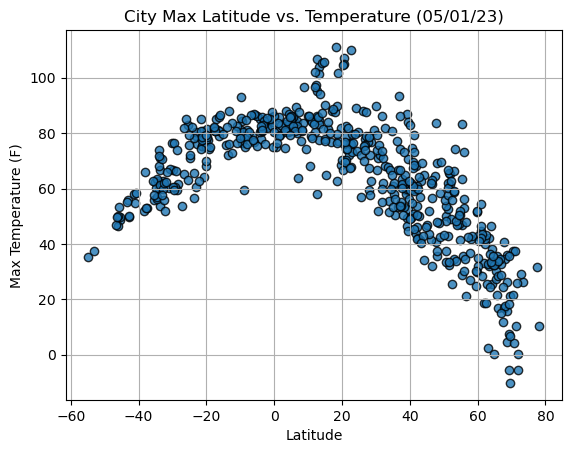

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/nels.jacobson2/Desktop/Analytics_Class_Folder/040323_Challenge/python-api-challenge/Starter_Code_April_3/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

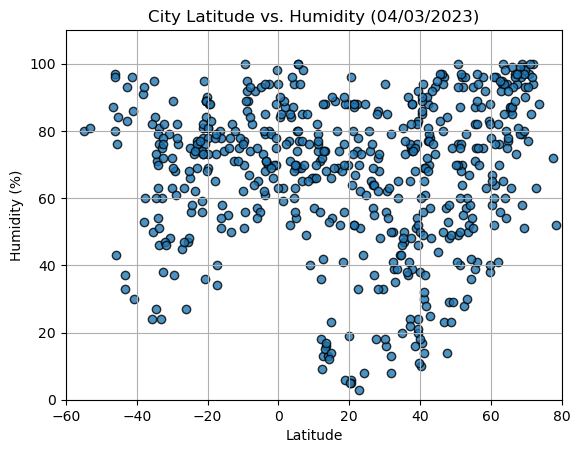

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/03/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60, 80)
plt.ylim(0, 110)
plt.grid(True)

# Save the figure
plt.savefig("/Users/nels.jacobson2/Desktop/Analytics_Class_Folder/040323_Challenge/python-api-challenge/Starter_Code_April_3/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

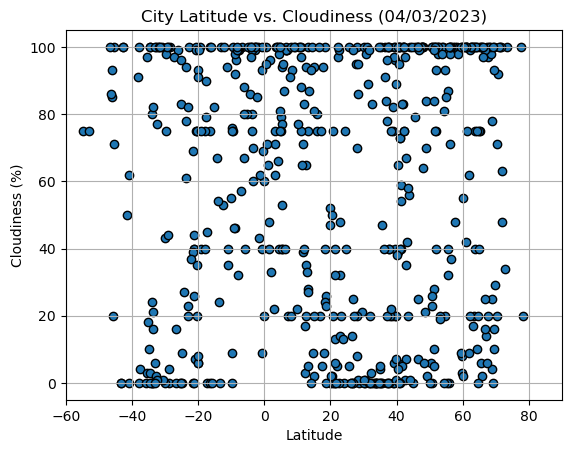

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/03/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60, 90)
plt.ylim(-5, 105)
plt.grid(True)

# Save the figure
plt.savefig("/Users/nels.jacobson2/Desktop/Analytics_Class_Folder/040323_Challenge/python-api-challenge/Starter_Code_April_3/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

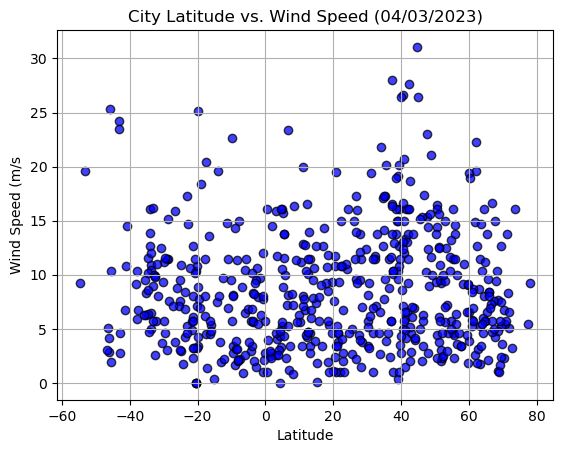

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/03/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s")
plt.grid(True)

# Save the figure
plt.savefig("/Users/nels.jacobson2/Desktop/Analytics_Class_Folder/040323_Challenge/python-api-challenge/Starter_Code_April_3/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, ylabel):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    # Create equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,slope*x_values+intercept,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sabang,5.8933,95.3214,84.56,77,87,10.02,ID,1682951536
3,preobrazheniye,42.9019,133.9064,41.40,78,7,4.61,RU,1682951274
5,ivanovka,42.8878,75.0850,56.82,57,35,2.89,KG,1682951540
6,dikson,73.5069,80.5464,26.28,88,100,16.11,RU,1682951541
7,danilov,58.1908,40.1717,41.94,92,100,9.15,RU,1682951543


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port keats,-14.2500,129.5500,75.74,55,67,7.49,AU,1682951537
2,kavieng,-2.5744,150.7967,82.02,80,100,10.63,PG,1682951538
4,vao,-22.6667,167.4833,75.96,75,100,14.67,NC,1682951539
8,castro,-24.7911,-50.0119,70.93,56,0,2.93,BR,1682951543
12,rikitea,-23.1203,-134.9692,78.84,77,23,5.28,PF,1682951548


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8508211795722538


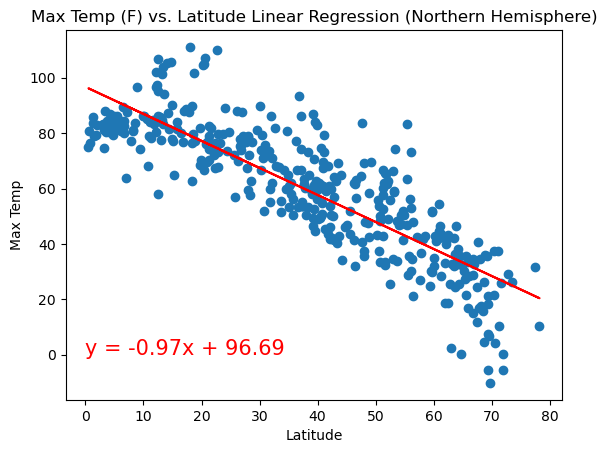

In [17]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp (F) vs. Latitude Linear Regression (Northern Hemisphere)", (0,0), "Max Temp")


The r-value is: 0.8386415507734876


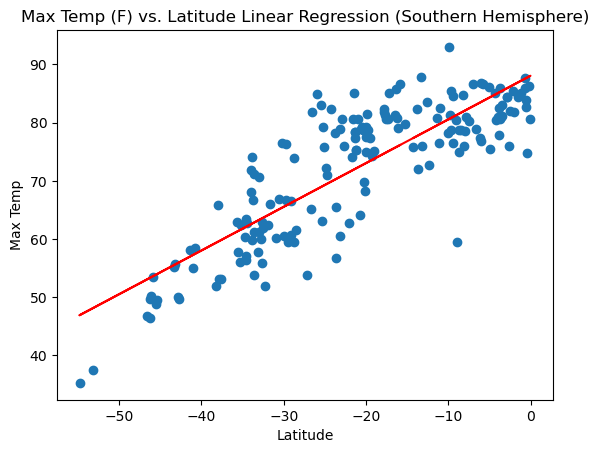

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp (F) vs. Latitude Linear Regression (Southern Hemisphere)", (0,0), "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20648211622514034


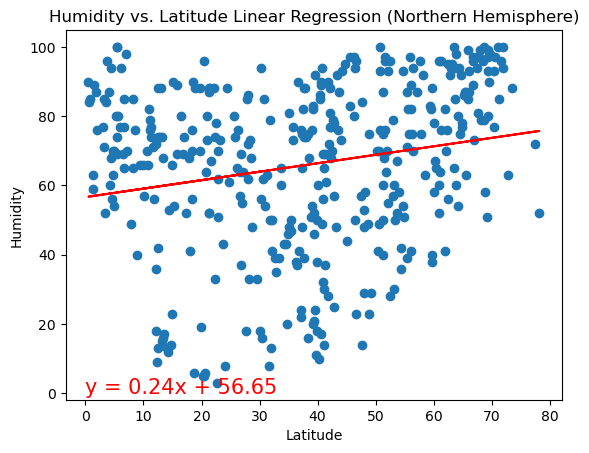

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs. Latitude Linear Regression (Northern Hemisphere)", (0,0), "Humidity")

The r-value is: 0.16630591538036782


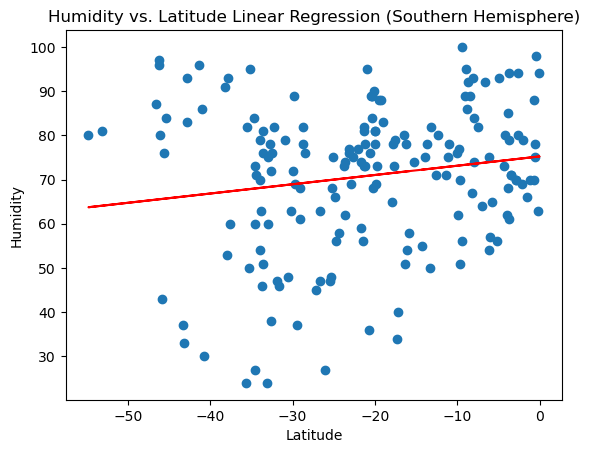

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity vs. Latitude Linear Regression (Southern Hemisphere)", (0,0), "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06028095829762284


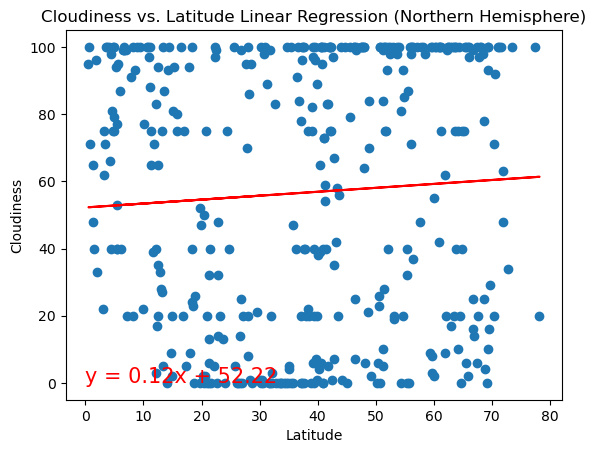

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)", (0,0), "Cloudiness")


The r-value is: 0.2077457463157085


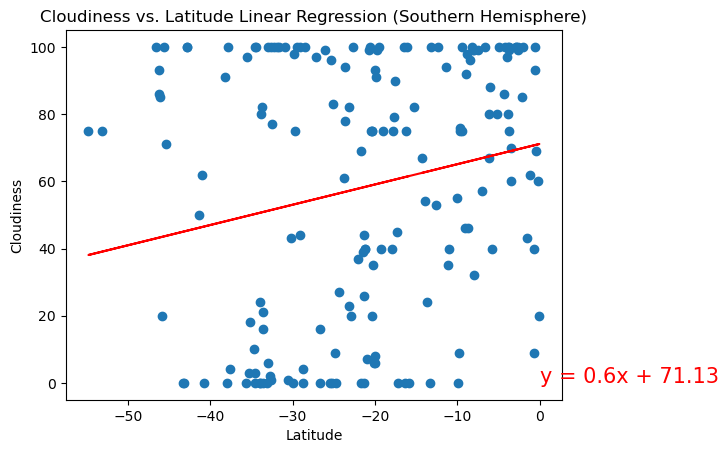

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)", (0,0), "Cloudiness")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03895322089119456


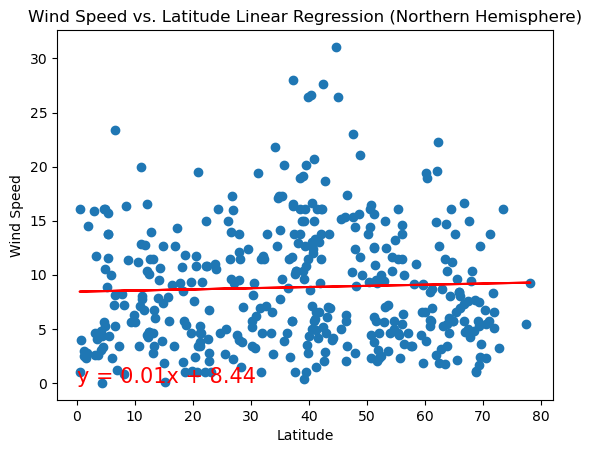

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)", (0,0), "Wind Speed")


The r-value is: -0.22697074125148373


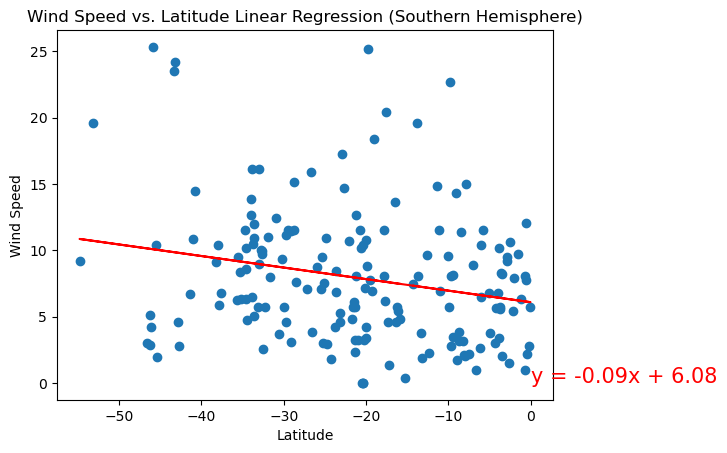

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)", (0,0), "Wind Speed")


**Discussion about the linear relationship:** YOUR RESPONSE HERE